<a href="https://colab.research.google.com/github/AstridSerruto/Projects/blob/master/Other/Market_Basket_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



What is an item?

    A product purchased from Olist.

What is an itemset?

    A collection of one or more product(s).

What is a transaction?

    An itemset that corresponds to a customer's order.



In [ ]:
#import modules
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Set default asthetic parameters
sns.set()

#Define path to data
data_path = 'https://github.com/datacamp/Market-Basket-Analysis-in-python-live-training/raw/master/data/'

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Load orders dataset
orders = pd.read_csv(data_path+'olist_order_items_dataset.csv')

#Load products items dataset
products = pd.read_csv(data_path+'olist_products_dataset.csv')

#Load translations dataset
translations = pd.read_csv(data_path+'product_category_name_translation.csv')


In [ ]:
#Print orders info
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_id       112650 non-null  object 
 1   order_item_id  112650 non-null  int64  
 2   product_id     112650 non-null  object 
 3   price          112650 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.4+ MB


In [ ]:
#Print Products header
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             32951 non-null  object 
 1   product_category_name  32341 non-null  object 
 2   product_weight_g       32949 non-null  float64
 3   product_length_cm      32949 non-null  float64
 4   product_height_cm      32949 non-null  float64
 5   product_width_cm       32949 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.5+ MB


In [ ]:
#Print translations header
translations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB



The product names are given in Portuguese.

Translate the names to English using a pandas DataFrame named translations.



In [ ]:
##Translate product names to English
products = products.merge(translations, on='product_category_name', how='left')

#Print English names
products['product_category_name_english']

0                          perfume
1                              art
2                   sports_leisure
3                             baby
4                       housewares
                   ...            
32946              furniture_decor
32947    construction_tools_lights
32948               bed_bath_table
32949        computers_accessories
32950               bed_bath_table
Name: product_category_name_english, Length: 32951, dtype: object

Convert product IDs to product category names.

In [ ]:
#Define product category name in orders DataFrame
orders = orders.merge(products[['product_id', 'product_category_name_english']], on='product_id', how='left')

#Print orders header.
orders.head()

,order_id,order_item_id,product_id,price,product_category_name_english
0,b8bfa12431142333a0c84802f9529d87,1,765a8070ece0f1383d0f5faf913dfb9b,81.0,sports_leisure
1,b8bfa12431142333a0c84802f9529d87,2,a41e356c76fab66334f36de622ecbd3a,99.3,NaN
2,b8bfa12431142333a0c84802f9529d87,3,765a8070ece0f1383d0f5faf913dfb9b,81.0,sports_leisure
3,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.9,cool_stuff
4,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.9,pet_shop


In [ ]:
#Drop products without a defined category
orders.dropna(inplace=True, subset=['product_category_name_english'])



In [ ]:
#Print number of unique items
len(orders['product_id'].unique())

32328

In [ ]:
#Print number of unique categories
len(orders['product_category_name_english'].unique())

71

Construct transactions from order and product data

Perform Market Basket Analysis on transactions.

Extract transactions from orders DataFrame.

Group all items in an order.

In [ ]:
#Identify transactions associated with example order.
example1 = orders[orders['order_id'] == 'fe64170e936bc5f6a6a41def260984b9'] ['product_category_name_english']

#Print example
example1 

111984     bed_bath_table
111985    furniture_decor
Name: product_category_name_english, dtype: object

In [ ]:
#Identify transactions associated with example order
example2 = orders[orders['order_id'] == 'fffb9224b6fc7c43ebb0904318b10b5f'] ['product_category_name_english']

#Print example
example2

112640    watches_gifts
112641    watches_gifts
112642    watches_gifts
112643    watches_gifts
Name: product_category_name_english, dtype: object

Map orders to transactions

In [ ]:
#Recover transaction itemsets from orders DataFrame
transactions = orders.groupby('order_id').product_category_name_english.unique()

#Print transactions header
transactions.head()

order_id
00010242fe8c5a6d1ba2dd792cb16214         [cool_stuff]
00018f77f2f0320c557190d7a144bdd3           [pet_shop]
000229ec398224ef6ca0657da4fc703e    [furniture_decor]
00024acbcdf0a6daa1e931b038114c75            [perfume]
00042b26cf59d7ce69dfabb4e55b4fd9       [garden_tools]
Name: product_category_name_english, dtype: object

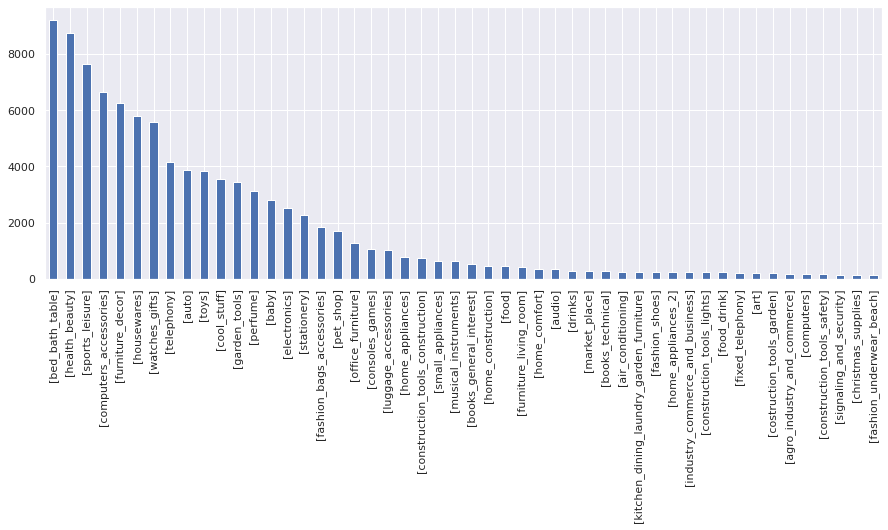

In [ ]:
#Plot 50 largest categories of transactions
transactions.value_counts()[:50].plot(kind='bar', figsize=(15,5))


Insight 1: The most common itemsets consist of a single item.

Insight 2: There's a long tail of categories that consist of infrequently purchased items.

In [ ]:
#Convert pandas series to list of lists
transactions = transactions.tolist()

Summarize final transaction data

In [ ]:
#Print length of transactions
len(transactions)

97256

In [ ]:
#Count number of unique item categories for each transaction
counts = [len(transaction) for transaction in transactions]

In [ ]:
#Print median number of items in a transaction
np.median(counts)

1.0

In [ ]:
#Print maximum number of items in a transaction
np.max(counts)

3

Association Rules and Metrics

In [ ]:
from mlxtend.preprocessing import TransactionEncoder

#Instantiate an encoder
encoder = TransactionEncoder()

#Fit encoder to list of lists
encoder.fit(transactions)

#Transform lists into one-hot encoded array
onehot = encoder.transform(transactions)

#Convert array to pandas DataFrame
onehot = pd.DataFrame(onehot, columns = encoder.columns_)

#Print header
onehot.head()

,agro_industry_and_commerce,air_conditioning,art,arts_and_crafts,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,books_technical,cds_dvds_music,christmas_supplies,cine_photo,computers,computers_accessories,consoles_games,construction_tools_construction,construction_tools_lights,construction_tools_safety,cool_stuff,costruction_tools_garden,costruction_tools_tools,cuisine,diapers_and_hygiene,drinks,dvds_blu_ray,electronics,fashion_bags_accessories,fashion_childrens_clothes,fashion_female_clothing,fashion_male_clothing,fashion_shoes,fashion_sport,fashion_underwear_beach,fixed_telephony,flowers,food,food_drink,furniture_bedroom,furniture_decor,furniture_living_room,furniture_mattress_and_upholstery,garden_tools,health_beauty,home_appliances,home_appliances_2,home_comfort,home_comfort_2,home_construction,housewares,industry_commerce_and_business,kitchen_dining_laundry_garden_furniture,luggage_accessories,market_place,music,musical_instruments,office_furniture,party_supplies,perfume,pet_shop,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Compute the support metric

In [ ]:
#Print support metric over all rows for each column
onehot.mean(axis=0)

agro_industry_and_commerce    0.001871
air_conditioning              0.002601
art                           0.002077
arts_and_crafts               0.000236
audio                         0.003599
                                ...   
stationery                    0.023762
tablets_printing_image        0.000812
telephony                     0.043175
toys                          0.039956
watches_gifts                 0.057827
Length: 71, dtype: float64

Compute the item count distribution over transactions

In [ ]:
#Print distribution of item counts
onehot.sum(axis=1).value_counts()

1    96530
2      711
3       15
dtype: int64

Create a column for an itemset with multiple items


In [ ]:
#Add sports_leisure and health_beauty to DataFrame
onehot['sports_leisure_health_beauty'] = onehot['sports_leisure'] & onehot['health_beauty']

#Print support value
onehot['sports_leisure_health_beauty'].mean(axis = 0)

0.00014394998766142962

Aggregate the dataset further by combining product sub-categories

In [ ]:
#Merge books_imported and books_technical
onehot['books'] = onehot['books_imported'] | onehot['books_technical']

#Print support values for books, books_imported, and books_technical
onehot[['books', 'books_imported', 'books_technical']].mean(axis=0)

books              0.003218
books_imported     0.000545
books_technical    0.002673
dtype: float64

Compute the confidence metric

In [ ]:
#Compute joint support for sports_leisure and heath_beauty
joint_support = (onehot['sports_leisure'] & onehot['health_beauty']).mean()

#Print confidence metric for sports_leisure -> health_beauty
joint_support / onehot['sports_leisure'].mean()

0.0018134715025906734

In [ ]:
#Print confidence for health_beauty -> sports_leisure
joint_support / onehot['sports_leisure'].mean()

0.0018134715025906734

$confidence(sports\_leisure \rightarrow health\_beauty)$ was higher than $confidence(health\_beauty \rightarrow sports\_leisure)$. Since the two have the same joint support, the confidence measures will differ only by the antecedent support. The higher confidence metric means that the antecedent has lower support.

The Apriori Algorithm and Pruning
The Apriori algorithm identifies frequent (high support) itemsets using something called the Apriori principle, which states that a superset that contains an infrequent item is also infrequent.
Pruning is the process of removing itemsets or association rules, typically based on the application of a metric threshold.

The mlxtend module will enable us to apply the Apriori algorithm, perform pruning, and compute association rules.


Applying the Apriori algorithm

In [ ]:
from mlxtend.frequent_patterns import apriori

#Apply apriori algorithm to data with min support threshold of 0.01
frequent_itemsets = apriori(onehot, min_support = 0.01)